# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [15]:
# student 1: Noam Levi 1722
# student 2: Sapir Twig 9007
# student 3: oriya even chen 0482

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [16]:
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Models Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score



In [17]:
# loading the train and the test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
# printing the first 5 rows of each datasets
print("Train set first 5 rows:")
print(train_df.head())
print("\nTest set first 5 rows:")
print(test_df.head())

Train set first 5 rows:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test set first 5 rows:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [18]:

train_stats = train_df.describe(include='all')
test_stats = test_df.describe(include='all')

print("\nTrain set statistics:")
print(train_stats)
print("-------------------------------------------------------------------------------------")
print("\nTest set statistics:")
print(test_stats)


Train set statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

<Figure size 800x600 with 0 Axes>

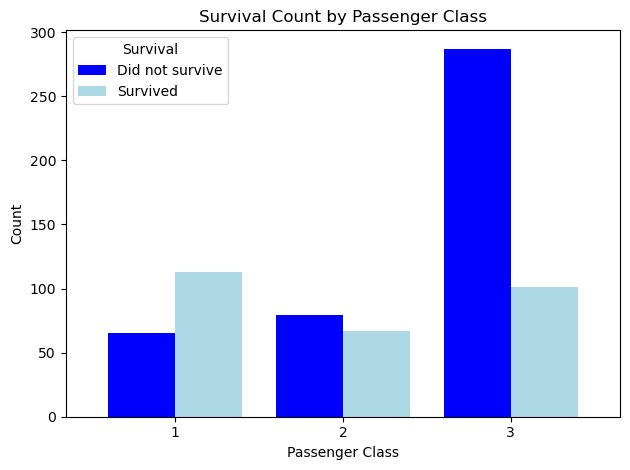

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


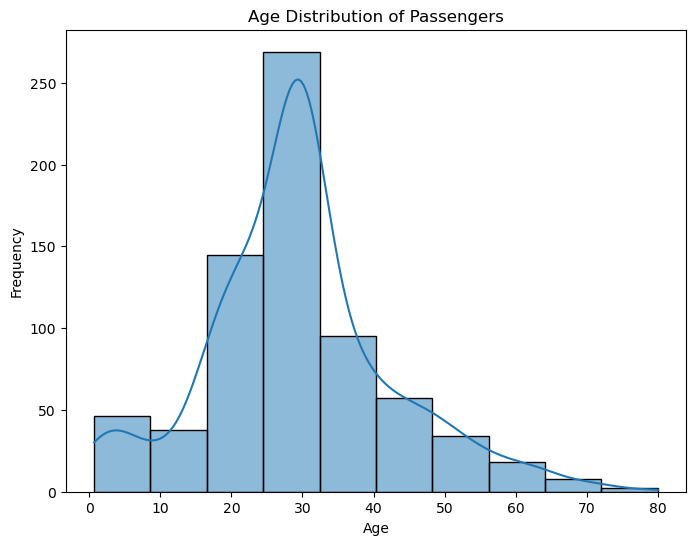

In [19]:
# Calculate survival counts for each passenger class
survival_by_class = train_df.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)

# Visualization: Bar plot of survival by passenger class (Pclass)
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', color=['blue', 'lightblue'], width=0.8)
plt.xticks(rotation=0)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival', loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 2: Histogram of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




## Part 3 - Experiments
You could add as many code cells as needed

In [20]:


# Prepare data for training without scaling
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train_no_scale = train_df[selected_features]
y_train = train_df['Survived']
X_test_no_scale = test_df[selected_features]
y_test = test_df['Survived']

# Display data without scaling
print("\nTraining set without scaling:")
print(X_train_no_scale.head().to_string(index=False))
print("\nTest set without scaling:")
print(X_test_no_scale.head().to_string(index=False))

# Scaling the data using MinMaxScaler to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train_no_scale)
X_test_scaled = scaler.transform(X_test_no_scale)

# Convert the scaled data back to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=selected_features)

# Display scaled training and test data
print("\nTraining set after scaling (range -1 to 1):")
print(X_train_scaled_df.head().to_string(index=False))
print("\nTest set after scaling (range -1 to 1):")
print(X_test_scaled_df.head().to_string(index=False))



Training set without scaling:
 Pclass  Sex  Age  SibSp  Parch    Fare  Embarked
      1    0 54.0      1      0 78.2667         1
      2    0 45.0      0      0 13.5000         0
      3    1 20.0      0      0  9.5000         0
      3    1 36.0      0      0  7.8958         0
      3    1 22.0      0      0  8.0500         0

Test set without scaling:
 Pclass  Sex       Age  SibSp  Parch    Fare  Embarked
      3    1 35.000000      0      0  7.0500         0
      3    1 30.000000      0      0  7.2500         0
      3    1 29.699118      0      0 14.5000         0
      3    0 21.000000      0      0  7.7500         2
      3    1 32.000000      0      0 56.4958         0

Training set after scaling (range -1 to 1):
 Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
   -1.0 -1.0  0.344510  -0.75   -1.0 -0.694467 -0.333333
    0.0 -1.0  0.117610  -1.00   -1.0 -0.947300 -1.000000
    1.0  1.0 -0.512669  -1.00   -1.0 -0.962914 -1.000000
    1.0  1.0 -0.109290  -1.00   -1.0 -0

In [21]:
# Define hyperparameters for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}

# Grid search for optimal KNN hyperparameters without scaling
knn_grid_no_scaling = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro')
knn_grid_no_scaling.fit(X_train_no_scale, y_train)
knn_best_no_scaling = knn_grid_no_scaling.best_estimator_

# Grid search for optimal KNN hyperparameters with scaling
knn_grid_with_scaling = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1_macro')
knn_grid_with_scaling.fit(X_train_scaled, y_train) 
knn_best_with_scaling = knn_grid_with_scaling.best_estimator_


In [22]:

# Define hyperparameters for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6]
}

# Grid search for optimal Decision Tree hyperparameters without scaling
dt_grid_no_scaling = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_no_scaling.fit(X_train_no_scale, y_train)
dt_best_no_scaling = dt_grid_no_scaling.best_estimator_

# Grid search for optimal Decision Tree hyperparameters with scaling
dt_grid_with_scaling = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1_macro')
dt_grid_with_scaling.fit(X_train_scaled, y_train) 
dt_best_with_scaling = dt_grid_with_scaling.best_estimator_


In [23]:

# Predictions based on the best models
knn_pred_no_scaling = knn_best_no_scaling.predict(X_test_no_scale)
knn_pred_with_scaling = knn_best_with_scaling.predict(X_test_scaled)  
dt_pred_no_scaling = dt_best_no_scaling.predict(X_test_no_scale)
dt_pred_with_scaling = dt_best_with_scaling.predict(X_test_scaled) 

# Calculate accuracy and classification reports
acc_knn_no_scaling = accuracy_score(y_test, knn_pred_no_scaling)
acc_knn_with_scaling = accuracy_score(y_test, knn_pred_with_scaling)
acc_dt_no_scaling = accuracy_score(y_test, dt_pred_no_scaling)
acc_dt_with_scaling = accuracy_score(y_test, dt_pred_with_scaling)

report_knn_no_scaling = classification_report(y_test, knn_pred_no_scaling)
report_knn_with_scaling = classification_report(y_test, knn_pred_with_scaling)
report_dt_no_scaling = classification_report(y_test, dt_pred_no_scaling)
report_dt_with_scaling = classification_report(y_test, dt_pred_with_scaling)

# Print the results
print("\nKNN without scaling - Accuracy: ", acc_knn_no_scaling)
print(report_knn_no_scaling)

print("\nKNN with scaling - Accuracy: ", acc_knn_with_scaling)
print(report_knn_with_scaling)

print("\nDecision Tree without scaling - Accuracy: ", acc_dt_no_scaling)
print(report_dt_no_scaling)

print("\nDecision Tree with scaling - Accuracy: ", acc_dt_with_scaling)
print(report_dt_with_scaling)




KNN without scaling - Accuracy:  0.7653631284916201
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       118
           1       0.69      0.57      0.62        61

    accuracy                           0.77       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.76      0.77      0.76       179


KNN with scaling - Accuracy:  0.8435754189944135
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.77      0.77      0.77        61

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Decision Tree without scaling - Accuracy:  0.8324022346368715
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       118
           1       0.79      0.69      0.74        61

    accuracy    

In [24]:
# Create a DataFrame to summarize the results for model comparison
results_comparison = pd.DataFrame({
    'Model': ['KNN', 'KNN', 'Decision Tree', 'Decision Tree'],
    'Scaling Applied': ['No', 'Yes', 'No', 'Yes'],
    'Accuracy (%)': [acc_knn_no_scaling * 100, acc_knn_with_scaling * 100, acc_dt_no_scaling * 100, acc_dt_with_scaling * 100],
    'Macro F1-Score': [
        classification_report(y_test, knn_pred_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, knn_pred_with_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, dt_pred_no_scaling, output_dict=True)['macro avg']['f1-score'],
        classification_report(y_test, dt_pred_with_scaling, output_dict=True)['macro avg']['f1-score']
    ]
})

# Print results comparison with a more visually appealing format
print("\n*** Model Results Summary ***")
print("-" * 30)
print(results_comparison.to_string(index=False))
print("-" * 30)

# Create a DataFrame to show the best hyperparameters for each model
best_hyperparameters_summary = pd.DataFrame({
    'Model and Scaling': ['KNN (No Scaling)', 'KNN (With Scaling)', 'Decision Tree (No Scaling)', 'Decision Tree (With Scaling)'],
    'Optimal Hyperparameters': [
        knn_grid_no_scaling.best_params_, 
        knn_grid_with_scaling.best_params_, 
        dt_grid_no_scaling.best_params_, 
        dt_grid_with_scaling.best_params_
    ]
})

# Print best hyperparameters summary with a cleaner format
print("\n*** Best Hyperparameters for Each Model ***")
print("-" * 40)
print(best_hyperparameters_summary.to_string(index=False))
print("-" * 40)



*** Model Results Summary ***
------------------------------
        Model Scaling Applied  Accuracy (%)  Macro F1-Score
          KNN              No     76.536313        0.727134
          KNN             Yes     84.357542        0.825924
Decision Tree              No     83.240223        0.806946
Decision Tree             Yes     83.240223        0.806946
------------------------------

*** Best Hyperparameters for Each Model ***
----------------------------------------
           Model and Scaling                   Optimal Hyperparameters
            KNN (No Scaling) {'metric': 'manhattan', 'n_neighbors': 7}
          KNN (With Scaling) {'metric': 'manhattan', 'n_neighbors': 3}
  Decision Tree (No Scaling)  {'max_depth': 3, 'min_samples_split': 2}
Decision Tree (With Scaling)  {'max_depth': 3, 'min_samples_split': 2}
----------------------------------------


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [25]:
# Choosing the best model combination based on results
print("---------------------------------------------------------------")
best_model_name = "KNN with Scaling"
best_params = {'n_neighbors': 3, 'metric': 'manhattan'}

# Printing the best model and its hyperparameters
print("Best Model Combination Selected:")
print(f"Model: {best_model_name}")
print(f"Best Hyperparameters: {best_params}")
print("---------------------------------------------------------------")

# Creating the model with the selected best hyperparameters
best_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])

# Training the best model on the training data (with scaling)
best_model.fit(X_train_scaled, y_train)

print("The model has been successfully trained on the training data.")



---------------------------------------------------------------
Best Model Combination Selected:
Model: KNN with Scaling
Best Hyperparameters: {'n_neighbors': 3, 'metric': 'manhattan'}
---------------------------------------------------------------
The model has been successfully trained on the training data.


## Part 5 - Apply on test and show model performance estimation

In [26]:
# Predict on the test set using the chosen KNN model with scaling
test_predictions = best_model.predict(X_test_scaled)

# Display the first predictions on the test set
print("\n** First Predictions on the Test Set **")
print("-" * 35)
for i, prediction in enumerate(test_predictions[:5], start=1):
    status = "Survived" if prediction == 1 else "Not Survived"
    print(f"Passenger {i}: {status}")
print("-" * 35)

# Evaluate model performance on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
classification_report_dict = classification_report(y_test, test_predictions, target_names=['Not Survived', 'Survived'], output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Filter the report for relevant metrics
classification_report_df = classification_report_df[['precision', 'recall', 'f1-score', 'support']].loc[['Not Survived', 'Survived']]
classification_report_df['support'] = classification_report_df['support'].astype(int)  # Convert support to integers

# Print the performance report with a cleaner format
print("\n** Model Performance on the Test Set **")
print("-" * 35)
print(classification_report_df.to_string(index=True))
print("-" * 35)

# Display the accuracy on the test set
print("\n** Model Accuracy on the Test Set **")
print("-" * 35)
print(f"Accuracy: {test_accuracy:.2f}")
print("-" * 35)



** First Predictions on the Test Set **
-----------------------------------
Passenger 1: Not Survived
Passenger 2: Not Survived
Passenger 3: Not Survived
Passenger 4: Survived
Passenger 5: Survived
-----------------------------------

** Model Performance on the Test Set **
-----------------------------------
              precision    recall  f1-score  support
Not Survived   0.881356  0.881356  0.881356      118
Survived       0.770492  0.770492  0.770492       61
-----------------------------------

** Model Accuracy on the Test Set **
-----------------------------------
Accuracy: 0.84
-----------------------------------
